<h1 style="text-align: center; vertical-align: middle;">Numerical Methods of Accelerator Physics</h1>
<h2 style="text-align: center; vertical-align: middle;">Lecture Series by Dr. Adrian Oeftiger</h2>

<h3 style="text-align: center; vertical-align: middle; margin-top: 1em; margin-bottom: 1em;">Guest Lecture by Dr. Michael Schenk</h3>

<img src="./img/etit.png" style="width: 20%; margin: auto;" />

<h3 style="text-align: center; vertical-align: middle;">Part 11: 20.01.2023</h3>

<h2>Run this notebook online!</h2>

Interact and run this jupyter notebook online:

<div class="alert alert-block alert-info" style="text-align:center;">
1. via the public mybinder.org service: <br />

<p style="text-align: center; margin-left, margin-right: auto; width: 100%;">
<a href="https://mybinder.org/v2/gh/aoeftiger/TUDa-NMAP-11/v1.0"><img src="./img/binder_logo.svg" /></a>
</p>
</div>

<div class="alert alert-block alert-success" style="text-align:center;">
2. on the <a href="https://tu-jupyter-i.ca.hrz.tu-darmstadt.de/">local TU Darmstadt jupyterhub $\nearrow$</a> (using your TU ID)

$\implies$ make sure you installed all the required python packages (see the [README](./README.md))!
</div>

Finally, also find this lecture rendered [as HTML slides on github $\nearrow$](https://aoeftiger.github.io/TUDa-NMAP-11/) along with the [source repository $\nearrow$](https://github.com/aoeftiger/TUDa-NMAP-11).

<h2>Run this first!</h2>

Imports and modules:

In [1]:
from config import (np, plt)
from scipy.constants import m_p, e, c
%matplotlib inline

<h2 style="color: #b51f2a">Refresher / preparation!</h2>

- Lecture by Dr. Andrea Santamaria Garcia: <a href="https://www.dropbox.com/s/vkqgojy81elpfs2/2023-01-KIT_SANTAMARIA_MLAcceleratorsIntro_v1.mov?dl=0">Introduction to machine learning</a>

<h2 style="color: #b51f2a">Today!</h2>

1. Introduction to reinforcement learning
2. Q-learning
3. Actor-critic methods

<h4>Disclaimer</h4>

- Today's introduction to reinforcement learning (RL) is by no means mathematically complete
- The idea is to give a high-level overview and some first ideas on the subject to hopefully spark your interest :)
- RL is a fascinating field: if you want to learn more, there are some great resources at the end

Smart learning vs. 'stupid' algorithms

<h2>Motivation</h2>

- discrete -> discrete: Q-table
- continuous -> discrete: DQN
- continuous -> continuous: actor-critic  => this is what we want for accelerators ...


=> will understand how lecture is structured ..



- Limitations of Q-learning
    - Q-table: only works for discrete set of $(s, a)$ pairs
    - Q-net: works for continuous $s$, but only discrete set of $a$ (finite number of nodes at output)


- Many real-world problems require continuous variables (e.g. parameter tuning for particle accelerators)
    - Popular solution: actor-critic methods 

<div style="text-align: center; width:100%;">
    <h2>Part I: introduction to reinforcement learning</h2>
</div>

<h2>Machine learning landscape</h2>


<center>

<img src="img/machine_learning_landscape.png" alt="Machine learning landscape" style="width: 60%;margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.linkedin.com/pulse/business-intelligence-its-relationship-big-data-geekstyle">GeekStyle</a></p>
    
</center>

- **Supervised learning**
    - **Goal:** obtain mapping $F(x) = y$ using a *labelled* dataset $(x, y)$
    - **Data:** $y$ is sometimes referred to as the ground truth or the label

- **Unsupervised learning**
    - **Goal:** identify structure in data
    - **Data:** no labelled dataset is available / needed

- **Reinforcement learning**
    - **Goal:** find how to behave optimally in a given environment
    - **Data:** an agent is actively interacting with the environment through trial-and-error and collects data (including positive or negative rewards)
    - Closest to artificial intelligence: provide **minimal external input** and let the agent explore and learn by itself

<h2>Reinforcement learning examples</h2>

**DeepMind: AlphaGo**
- One of the more famous RL successes: agent learning to play the game of Go and beating world champion Lee Sedol
- In case you want to know more: <a href="https://www.youtube.com/watch?v=WXuK6gekU1Y">documentary on YouTube</a>

<center>

<img src="img/alpha_go.png" alt="AlphaGo" style="width: 40%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"><a href="https://openai.com/blog/emergent-tool-use/">DeepMind</a></p>
    
</center>

<h2>Reinforcement learning examples</h2>

**OpenAI: hide-and-seek**
- RL agents learning to play hide-and-seek in a multi-agent setting
- Recommend to watch the <a href="https://openai.com/blog/emergent-tool-use/">short video</a>

<center>

<img src="img/hide_and_seek.png" alt="Hide and seek" style="width: 40%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"><a href="https://openai.com/blog/emergent-tool-use/">OpenAI</a></p>
    
</center>

<h2>Reinforcement learning examples</h2>

**DeepMind & EPFL: tokamak control**
- Shaping and maintaining high-temperature plasma within tokamak vessel is challenging
- Requires high-dimensional, high-frequency, closed-loop control using magnetic actuator coils
- Paper describes RL agent that was successfully trained as a magnetic controller

<center>

<img src="img/tokamak.png" alt="RL for Tokamak" style="width: 40%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"><a href="https://www.nature.com/articles/s41586-021-04301-9">paper</a></p>
    
</center>

<h2>Reinforcement learning examples</h2>

**DeepMind: AlphaTensor**
- Matrix multiplication is a very fundamental mathematical operation
- Improving its computational efficiency can benefit many fields
- RL agent discovered more computationally efficient algorithms than developed by humans

<center>

<img src="img/alpha_tensor.png" alt="AlphaTensor" style="width: 30%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"><a href="https://www.nature.com/articles/s41586-022-05172-4">paper</a></p>

</center>

<h2>What is reinforcement learning?</h2>

- **Application:** online control / decision-making tasks
- **Goal:** learn optimal behavior in given environment
- **Trial-and-error learning:** agent takes actions in environment and collects rewards
- We provide **minimal input**: reward function, state definition

<center>

<img src="img/rl_schematic.png" alt="RL schematically" style="width: 50%;margin-top: 1cm;" />
    
</center>

<h2>An example: Pacman</h2>

- For games it is typically easy to define what the state, actions, and rewards are
    - **State:** where am I? Where are ghosts, snacks, cookies, walls?
    - **Actions:** up, down, left, right
    - **Reward:** food (+), ghosts (-)

<center>

<img src="img/pacman.png" alt="Pacman example" style="width: 40%; margin-top: 1cm;" />
    
</center>

<h2>Our environment</h2>

- A **grid maze** with fires and a target field
- The player, or agent, represented by a red cross, has to navigate through it and find the target field

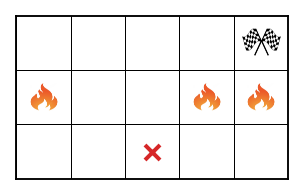

In [2]:
from utils import Maze

env = Maze(height=3, width=5)
env.plot();

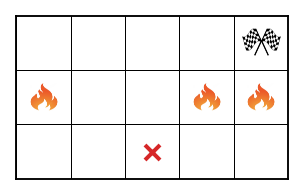

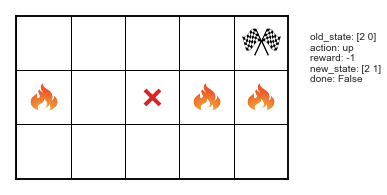

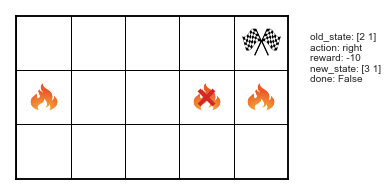

In [3]:
# Take some actions
env.plot()
env.step(action='up')
env.plot()
env.step(action='right')
env.plot();

<h2>RL definitions for our maze</h2>

- **State:** player / agent position (red cross)
- **Action:** `up`, `down`, `left`, `right`
- **Reward:** every action comes with a reward, depending on the new state we end up in
    - Taking a step into an empty field: -1
    - Bumping into walls: -5
    - Going through fire: -10
    - Reaching the goal: +30

<h2>Making the best decisions ... </h2>

- Obviously there are better and worse trajectories to reach the target. "Better" and "worse" refer to how much reward we can collect along the way.
- We will get back to that when talking about the objective of RL

**Exercise:**
using the reward definitions from the previous slide, try to calculate the cumulative rewards for the trajectories shown below. Can you tell which of the paths are equally good / bad?

<center>

<img src="img/example_trajectories.png" alt="Example trajectories" style="width: 35%;" />
    
</center>

<h2>Formalizing the problem</h2>

<h3>Markov process</h3>

- A **memoryless random process** consisting of a set of **states** and **state transition probabilities**
- **Markov property:** the process is memoryless, i.e. the future depends only on the present state, but not on how we got there.

<center>

<img src="img/markov_chain.png" alt="Markov chain" style="width: 50%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.davidsilver.uk/wp-content/uploads/2020/03/MDP.pdf">D. Silver - Lecture on RL</a></p>
    
</center>

<h3>Markov reward process</h3>

- A Markov process that has in addition a **reward function** and a **discount factor** $\gamma \in [0, 1]$
- **Return** $G_t$: sum of discounted future rewards

$$G_t = \sum_k \gamma^k \, r_{t+k}$$

- $\gamma$ controls the relative importance of immediate vs future rewards
    - $\gamma \rightarrow 0$: we only care about immediate rewards
    - $\gamma \rightarrow 1$: we care about rewards far in the future

<center>
    
<img src="img/markov_reward_process.png" alt="Markov reward process" style="width: 50%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.davidsilver.uk/wp-content/uploads/2020/03/MDP.pdf">D. Silver - Lecture on RL</a></p>
    
</center>

<h3>Markov decision process (MDP)</h3>

- add good image here ...
- talk about episodic and non-episodic MDPs

<h3>The policy $\pi$</h3>

- The policy defines the decision making (= behavior) of the agent
- It is a probability distribution over the state-action space. You can also think of it as a mapping that assigns to each state-action pair $(s, a)$ a probability

$$\pi: S \times A \rightarrow [0, 1]$$


- $S$ and $A$ are the state and action spaces, respectively
    - For our maze example: $S = \{[0, 0], [0, 1], ..., [\text{width}-1, \text{height}-1]\}$ and $A = \{\text{'up', 'down', 'left', 'right'}\}$.

**Exercise:** back to our maze! For now we do not yet care about the best behavior. Instead, try to **implement a random policy**, i.e. every action $a \in \{\text{'up', 'down', 'left', 'right'}\}$ is picked with equal probability in every state.

**a)** Initialize a Maze with `height=3, width=2` and fill in the argument of `np.random.choice` with a list of the four possible actions to uniformly select one of them at every step.

**b)** Look through the output and check whether it all makes sense (how player position moves and reward that is obtained).

In [4]:
env = Maze(# fill in here #)
env.plot(title='Initial state')

done = False
while not done:
    action = np.random.choice(actions# fill in here #)
    state, action, reward, new_state, done = env.step(action)
    env.plot();

SyntaxError: invalid syntax (<ipython-input-4-7852d64647fd>, line 4)

<h2>The RL objective</h2>

- **Find optimal behavior in a given environment:** in every state we want the agent to take the best action
- This is also known as the **optimal policy** $\pi^*$
- Formally, $\pi^*$ maximizes the return $G_t = \sum_k \gamma^k \, r_{t+k}$, i.e. the cumulative sum of discounted future rewards.

- **For our maze, RL will solve ...**
    - For any given field that we are currently on (= state), what is the action that maximizes the sum of rewards collected over time?
    - Or: from where I stand - how can I reach the target field with the **least steps and not going through fires** (if possible) ?

<h2>RL taxonomy</h2>

- There are many **different algorithms** for finding the optimal policy $\pi^*$
- They all have their pros and cons
    - Often the **sample-efficiency** is crucial
    - It tells us **how many interactions with the environment** (= how many data samples) are necessary to solve the RL problem
    
    
- **Today:** we are going to look at **Q-learning**. It is one of the **core ideas** of many RL algorithms, such as
    - Deep Q-learning (DQN)
    - Actor-critic methods (DDPG, TD3, SAC)

<center>

<img src="img/rl_taxonomy.png" alt="The RL algorithm zoo" style="width: 80%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html">Open AI - Spinning Up</a></p>
    
</center>

<h3>Classification according to sample efficiency</h3>

<center>

<img src="img/sample_efficiency.png" alt="Sample efficiency" style="width: 70%; margin-top: 2cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://rail.eecs.berkeley.edu/deeprlcourse/">S. Levine, "Deep Reinforcement Learning" (lecture)</a></p>
    
</center>

<div style="text-align: center; width:100%;">
    <h2>Part II: Q-learning</h2>
</div>

<h2>Q-learning</h2>

- Uses a **value function** $Q: S \times A \rightarrow \mathbb{R}$, where $S$ and $A$ are the state and action spaces
- The Q-value $Q_\pi(s, a)$ corresponds to the **"quality" of the state-action pair** $(s, a)$ when following policy $\pi$
    - Quality is measured as the **expected return**
    $Q_\pi(s, a) = \mathbb{E}[G_t | S_t = s, A_t = a]$
    - $G_t = \sum_k \gamma^k \, r_{t+k}$

- **Temporal difference (TD) rule**
    - Q-values are initially unknown / random, but can be learned **iteratively** following the TD update rule

$$Q(s, a) \leftarrow Q(s, a) + \alpha \underbrace{[\underbrace{r + \gamma \text{max}_{a'} \, Q(s', a')}_{\text{Q-value target}} - \underbrace{Q(s, a)}_{\text{Q-value prediction}}]}_{\text{TD error}}$$

- Uses **trial-and-error experiences** collected by the agent in one step $(s, a, r, s')$: *state, action, reward, next state*.
- $\alpha$: learning rate

- **Bootstrapping**
    - We are using the estimate $\text{max}_{a'} Q(s', a')$ to define our target (= ground truth label) for the TD error
    - This can sometimes lead to unstable trainings, especially when using neural networks. A workaround was developed by DeepMind (*see <a href="https://arxiv.org/abs/1509.06461">Double Q-learning</a>*)

<center>

<img src="img/backup_diag_qlearn.png" alt="Q-learning backup diagram" style="width: 60%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">
    
</center>

<h2>Obtaining the optimal policy</h2>

- Once Q-values have converged, it is easy to read off the optimal policy $\pi^*$

$$
\pi^*(s, a) = \left\{
    \begin{array}{ll}
        1 & \mbox{if } a = \text{argmax}_{a'} \, Q(s, a') \\
        0 & \mbox{otherwise.}
    \end{array}
\right.
$$

- This is also known as the **greedy policy**: it acts greedily in terms of expected return by assigning probability $1$ to the action that maximizes the Q-function.

<h2>How to implement Q-learning?</h2>

- We need a way to track and update the Q-values for each state-action pair
    - Traditional Q-learning: **Q-table**
    - Deep Q-learning: **neural network**
    

- Let's try both!

<center>

<img src="img/qlearn_dqn.png" alt="Q-learning vs DQN" style="width: 45%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.assemblyai.com/blog/reinforcement-learning-with-deep-q-learning-explained/">AssemblyAI</a></p>

</center>

<h3>Exploration-exploitation tradeoff</h3>

- To learn the best policy in the most efficient manner, we have to find a **good trade-off between exploitation and exploration**.
- This means, we have to **ensure that the agent keeps exploring** new actions during training and does not just always follow the path that provides the highest expected return.
- After all, Q-values might **not have converged yet**, there may be better solutions.



**Analogy**  ==> reduce text / add image
- Imagine you go to your favorite restaurant and you always order the same dish, because you like it so much (gets you highest reward to your current knowledge; you are in full exploitation mode).
- But if you do not explore any of the other dishes, you might actually miss out and not get the best one on the entire menu.

<h2>Q-table learning</h2>

- add here explanation how Q-table learning works ...

Initial Q-table
+--------+-----+------+------+-------+
| s \ a  |  up | down | left | right |
+--------+-----+------+------+-------+
| (0, 0) | 0.0 | 0.0  | 0.0  |  0.0  |
| (0, 1) | 0.0 | 0.0  | 0.0  |  0.0  |
| (1, 0) | 0.0 | 0.0  | 0.0  |  0.0  |
| (1, 1) | 0.0 | 0.0  | 0.0  |  0.0  |
+--------+-----+------+------+-------+


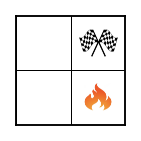

In [5]:
from plot_utils import print_qtable
from utils import Maze, QLearner

env = Maze(width=2, height=2, fire_positions=[[1, 0]])
_ = env.plot(add_player_position=False)

# Initialize Q-learner with Q-table
qtable_learner = QLearner(env, q_function='table')

print('Initial Q-table')
q_table = qtable_learner.q_func.get_q_table()
print_qtable(q_table)

In [6]:
qtable_learner.train(500)

print('Q-table after 500 episodes')
q_table = qtable_learner.q_func.get_q_table()
print_qtable(q_table)

100%|██████████| 500/500 [00:02<00:00, 198.01it/s]

Q-table after 500 episodes
+--------+------+------+------+-------+
| s \ a  |  up  | down | left | right |
+--------+------+------+------+-------+
| (0, 0) | 23.3 | 13.3 | 13.9 |  8.6  |
| (0, 1) | 18.1 | 15.9 | 17.4 |  28.0 |
| (1, 0) | 23.4 | 4.8  | 11.8 |  4.7  |
| (1, 1) | 0.0  | 0.0  | 0.0  |  0.0  |
+--------+------+------+------+-------+


In [7]:
qtable_learner.train(1500)

print('Q-table after 2000 episodes')
q_table = qtable_learner.q_func.get_q_table()
print_qtable(q_table)

100%|██████████| 1500/1500 [00:07<00:00, 191.19it/s]

Q-table after 2000 episodes
+--------+------+------+------+-------+
| s \ a  |  up  | down | left | right |
+--------+------+------+------+-------+
| (0, 0) | 28.7 | 23.4 | 23.4 |  19.6 |
| (0, 1) | 24.7 | 27.4 | 24.7 |  30.0 |
| (1, 0) | 30.0 | 19.5 | 27.3 |  19.4 |
| (1, 1) | 0.0  | 0.0  | 0.0  |  0.0  |
+--------+------+------+------+-------+


<h2>Evolution of Q-table values over training time</h2>

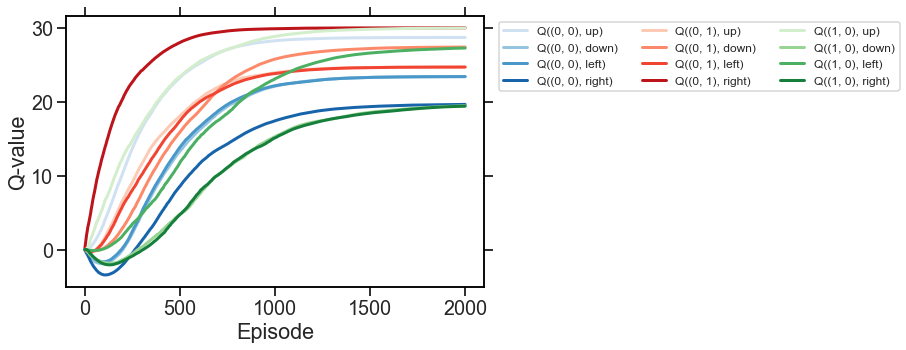

In [8]:
qtable_learner.plot_training_evolution()

**Question:** would you consider the training to be complete from the evolution of Q-values above?

**Exercise:**

**a)** Initialize a bigger maze `height=4`, `width=5`, with `fire_positions=[[2, 1], [2, 2]]` and use `q_function='table'` in the `QLearner` class. Then train for `5000` episodes. 

**b)** Once the training is finished, plot the Q-table.

**c)** Finally, also plot the greedy policy. Compare it to the Q-values to verify that it indeed always picks the action with the highest Q-value.

In [9]:
from utils import Maze, QLearner

env = Maze(width=4, height=3, fire_positions=[[2, 1], [2, 2]])
qtable_learner = QLearner(env, q_function='table')
qtable_learner.train(5000)

100%|██████████| 5000/5000 [00:33<00:00, 148.63it/s]


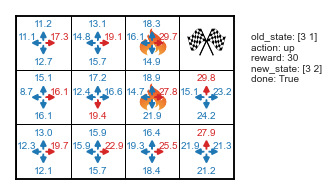

In [10]:
from plot_utils import plot_q_table

q_table = qtable_learner.q_func.get_q_table()
ax = env.plot(add_player_position=False)
plot_q_table(q_table, env.target_position, env.fire_positions, ax=ax)

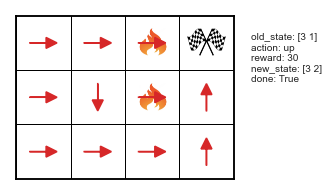

In [11]:
from plot_utils import plot_greedy_policy

policy = qtable_learner.q_func.get_greedy_policy()
ax = env.plot(add_player_position=False)
plot_greedy_policy(policy, env.target_position, env.fire_positions, ax=ax)

<h2>Deep Q-learning (DQN)</h2>

- Developed by DeepMind to play Atari games initially
- We replace the Q-table by a simple, feed-forward neural network
- We update its weights according to the TD rule, similar to the Q-table learner


- explain the NN idea briefly

<center>

<img src="img/q_net.png" alt="Q-net" style="width: 50%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"></p>

</center>

**Exercise:**

**a)** Repeat the same steps as above for the Q-table learner, but this time using `q_function='net'` as an argument in the `QLearner` class. Train it for `2000` episodes. This will take a couple of minutes.

**b)** Compare the Q-values and policy to the one obtained with Q-table learning. Do you see differences? Why could that be?

In [12]:
from utils import Maze, QLearner

env = Maze(width=4, height=3, fire_positions=[[2, 1], [2, 2]])
qnet_learner = QLearner(env, q_function='net')
qnet_learner.train(2000)

100%|██████████| 2000/2000 [02:31<00:00, 13.19it/s]


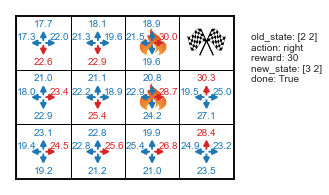

In [13]:
from plot_utils import plot_q_table

q_table = qnet_learner.q_func.get_q_table()
ax = env.plot(add_player_position=False)
plot_q_table(q_table, env.target_position, env.fire_positions, ax=ax)

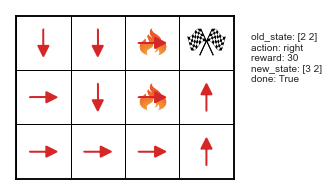

In [14]:
from plot_utils import plot_greedy_policy

policy = qnet_learner.q_func.get_greedy_policy()
ax = env.plot(add_player_position=False)
plot_greedy_policy(policy, env.target_position, env.fire_positions, ax=ax)

<h2>Other important aspects of RL</h2>

<h3>Experience replay</h3>

leave out ...

<center>

<img src="img/replay.png" alt="Q-learning vs DQN" style="width: 80%;margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.endtoend.ai/paper-unraveled/cer/">endtoend.ai</a></p>

</center>

*Note that experience replay can only be used for on-policy, but not for off-policy algorithms (see e.g. <a href="https://towardsdatascience.com/on-policy-v-s-off-policy-learning-75089916bc2f">here</a> if interested)*

<h2>Exercise ideas</h2>

- Observe how policy changes with different amounts of training iterations
- Compare Q-values for Q-table and Q-net methods: what differences do you see? Are the policies identical? What's happened?
- Change `fire_reward` to a low value (e.g. -2) and check how that changes your policy.

<!-- - Check the Q-values on the grid after training: can you find fields where several actions have the same Q-values? What does that mean? Does it make sense intuitively?-->

<h2>Comprehension question ideas</h2>

- Is the Markov property fulfilled for our maze environment? Why or why not?
- Why does Q-learning in its basic form only work for discrete action spaces? (or: what's the issue with Q-learning when working with continuous actions?)
- Describe how you can obtain the optimal policy once the Q-function has converged.
- Which parameter do you have to tune to put more weight on immediate rewards?
- Why might some of the Q-table values converge earlier than others?
- ...

- Try yes / no questions, simplify

<h2>Hit Me!</h2>

(...)

<p style="color: #e6541a;">$\implies$ play with the value XY and try out ABC! (Exercise for the students to change some cells)</p>

<div style="text-align: center; width:100%;">
    <h2>Part III: actor-critic methods</h2>
</div>

<h2>Actor-critic scheme</h2>

- **Two networks**
    - **Actor:** represents the policy $\pi$
    - **Critic:** predicts Q-values
    
    
- **Actor**
    - Mapping $\pi: S \rightarrow A$
    - For each (continuous) state, it proposes a (continuous) action
    
    
- **Critic**
    - Mapping $Q: S\times A \rightarrow \mathbb{R}$
    - Evaluates quality of proposed $(s, a)$ pair through its Q-value
    - Feeds back to the actor network: policy gradient rule

<center>

<img src="img/actor_critic.png" alt="Actor-critic schematic" style="width: 60%;" />

</center>

- **Critic parameters** $\theta$ are updated according to the **temporal difference rule** (like in Q-learning)
- **Actor parameters** $\chi$ are updated via **policy gradient**: for a given state $s$, how does the actor have to adjust its parameters to propose an action $a$ such that $Q(s,a)$ is higher next time

<h2>Accelerator trajectory steering</h2>

What is awake?

<center>

<img src="img/awake_beamline.png" alt="AWAKE beamline" style="width: 50%; margin-top: 1cm;" />
    
</center>

- How does the actor-critic algorithm work? Why do we go for that one?
- Introduce the accelerator trajectory steering environment
- Exercise: train it and see how well it does ...

<h2>Summary</h2>

- ... all contents as relevant for the exam

<h2>Literature</h2>

- R.S. Sutton and A.G. Barto, <a href="http://incompleteideas.net/book/RLbook2020.pdf">"Reinforcement learning - an introduction"</a>, Book, 2nd edition, 2020.
- S. Levine, <a href="https://rail.eecs.berkeley.edu/deeprlcourse/">Deep Reinforcement Learning</a>, Lecture, UC Berkeley, 2022.
- D. Silver, <a href="https://www.davidsilver.uk/teaching/">Reinforcement learning</a>, Lecture, University College London (UCL), 2015.

<h2>Open items?</h2>

- Exploration-exploitation tradeoff
- Challenges: reward shaping / definition
- Double Q-learning
- State must be (at least partially) observable 
